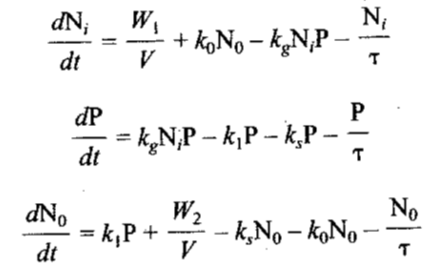

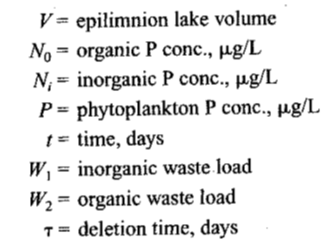

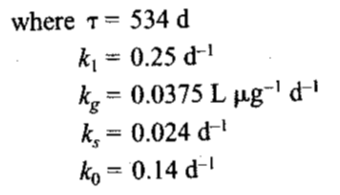

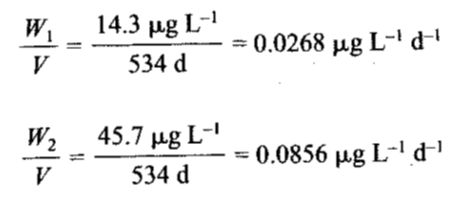

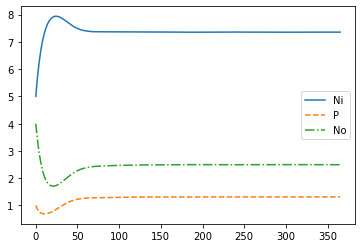

In [8]:
# import statements
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# define global constants
tau = 534 # days
k1, kg, ks, ko = 0.25, 0.0375, 0.024, 0.14 # per day type units
W1V, W2V = 0.0268, 0.0856 # ug/L/d
# define ODE function
def Deriv(t, C_arr):
    Ni, P, No = C_arr
    r_growth = kg*Ni*P
    r_death = k1*P
    r_release = ko*No
    r_settling_P = ks*P
    r_settling_o = ks*No
    dNi = W1V  + r_release - r_growth - Ni/tau
    dP = r_growth - r_death - r_settling_P - P/tau
    dNo = r_death + W2V - r_settling_o - r_release - No/tau
    return [dNi, dP, dNo]
# specify IC and solve the ODE
Ni_0, P_0, No_0 = 5, 1, 4
soln = solve_ivp(Deriv, (0, 365), [Ni_0, P_0, No_0], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,365,365)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Ni')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='P')
plt.plot(t_arr, soln.sol(t_arr)[2], '-.', label='No')
plt.legend()